# Homework - Comparing Models
Run the following code and then answer the numbered questions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

df = pd.read_csv('employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   left_company                   1000 non-null   object
 1   age                            1000 non-null   int64 
 2   frequency_of_travel            1000 non-null   object
 3   department                     1000 non-null   object
 4   commuting_distance             1000 non-null   int64 
 5   education                      1000 non-null   int64 
 6   satisfaction_with_environment  1000 non-null   int64 
 7   gender                         1000 non-null   object
 8   seniority_level                1000 non-null   int64 
 9   position                       1000 non-null   object
 10  satisfaction_with_job          1000 non-null   int64 
 11  married_or_single              1000 non-null   object
 12  last_raise_pct                 1000 non-null   int64 
 13  last

#### Splitting into training and test sets

In [3]:
from sklearn.model_selection import train_test_split
targetCol = 'left_company'
featureCols = [x for x in df.columns if x != targetCol]

y = df[targetCol]
X = df[featureCols]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

print(f'Target: {targetCol}')
print('Features:')
print(*featureCols, sep=',\t')
print('\n')
print(f'Training examples: {x_train.shape[0]:,}')
print(f'Test examples: {x_test.shape[0]:,}')

Target: left_company
Features:
age,	frequency_of_travel,	department,	commuting_distance,	education,	satisfaction_with_environment,	gender,	seniority_level,	position,	satisfaction_with_job,	married_or_single,	last_raise_pct,	last_performance_rating,	total_years_working,	years_at_company,	years_in_current_job,	years_since_last_promotion,	years_with_current_supervisor


Training examples: 800
Test examples: 200


# Question 1
- Set-up a feature processing pipeline using the training data.  
- While the data doesn't contain missing values, assume the test data could.  
- Use the below lists to split the features that should be treated as numerical and categorical variables.  
- I would recommend printing out verification output to verify the pipeline transforms the data as expected.

In [4]:
numericalFeatures = ['age', 'commuting_distance', 'last_raise_pct', 'total_years_working', 'years_at_company',
                    'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']

categoricalFeatures = ['frequency_of_travel', 'department', 'education', 'satisfaction_with_environment',
                       'gender', 'seniority_level', 'position', 'satisfaction_with_job', 'married_or_single',
                      'last_performance_rating']


In [5]:
# No missing  Values in dataset 
df.isna().sum().sum()

0

0    500
1    500
Name: left_company, dtype: int64

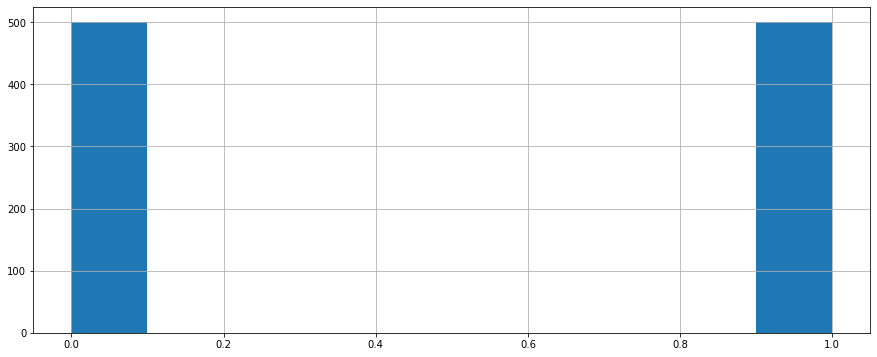

In [6]:
#Balenced Dataset 
y.replace(['Yes','No'],[1,0], inplace=True)
y.hist(bins =10, figsize=(15,6));

y.value_counts()

In [7]:
# Creating pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler for Numerical variables
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import MissingIndicator

pp_num = Pipeline([
    ('num_imp', SimpleImputer(strategy='median', add_indicator=False)),
    #('rob_num',StandardScaler())
])

ct_Numerical = ColumnTransformer([
    ('mi', MissingIndicator(), X.columns),
    ('pp_num', pp_num, numericalFeatures)
])


#pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler for categorical variables
pp_cat = Pipeline([
    ('cat_imp', SimpleImputer(strategy='most_frequent', add_indicator=False, fill_value='missing')),
    ('ohe_cat', OneHotEncoder(sparse=False, handle_unknown='error',drop='if_binary'))
])


ct_catogirical = ColumnTransformer([
    ('mi', MissingIndicator(), X.columns),
    ('pp_cat', pp_cat, categoricalFeatures)
])

In [8]:
Numerical_train= ct_Numerical.fit_transform(x_train).astype(np.float)
Catogirical_train= ct_catogirical.fit_transform(x_train).astype(np.float)
print('Numerical train  Data Shape:',Numerical_train.shape)
print('Catogirical train  Data Shape:',Catogirical_train.shape)

Numerical train  Data Shape: (800, 8)
Catogirical train  Data Shape: (800, 38)


In [9]:
# Combine both Numerical and Categorical 
from sklearn.compose import ColumnTransformer
from sklearn.impute import MissingIndicator
ct = ColumnTransformer([
    ('mi', MissingIndicator(), X.columns),
    ('pp_num', pp_num, numericalFeatures),
    ('pp_cat', pp_cat, categoricalFeatures)
])

In [10]:
xtrain= ct.fit_transform(x_train).astype(np.float)
pd.DataFrame(xtrain).head() 

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,33.0,10.0,13.0,8.0,4.0,3.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,23.0,9.0,19.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,18.0,5.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,31.0,1.0,11.0,10.0,10.0,8.0,4.0,7.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,29.0,6.0,13.0,10.0,10.0,8.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [11]:
xtest=ct.transform(x_test).astype(np.float)
xtest.shape

(200, 46)

Inference:
Here we are splitting data based on given criteria
insted of One-Hot encoding we can convert below  features based on frequency/Count using replace/get_dummies
it will reduce the Dimension and Sparcity 

Features: 
frequency_of_travel{'Travel_Frequently', 'Non-Travel', 'Travel_Rarely'} and Count3
department{'Research & Development', 'Sales', 'Human Resources'} and Count3
gender{'Male', 'Female'} and Count2
married_or_single{'Divorced', 'Married', 'Single'} and Count3

# Question 2
- Using cross-validation evaluate a logistic regression model, evaluate three (4) different regularization strengths with `l2`, with one model containing no regularization.  
- Which regularization strength would be ideal for logistic regression?
- Use as much code as you need to defend your opinion.  
- Comment on your rationale for your choice.

In [12]:
# LogisticRegression with No Regularization 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

model = LogisticRegression()

pipe_final = Pipeline([
    ('ct_step', ct),
    ('model', model )
])

pipe_final_n=pipe_final.fit(x_train,y_train)
scores=cross_val_score(pipe_final_n,x_test,y_test,cv=10)
scores.mean()

0.7300000000000001

In [13]:
#Logistic Regression with L2 Regularization and C=100:
model1 = LogisticRegression(C=100,penalty='l2' )

pipe_final1 = Pipeline([
    ('ct_step', ct),
    ('model', model1 )
])

pipe_final_n1=pipe_final1.fit(x_train,y_train)
scores1=cross_val_score(pipe_final_n1,x_test,y_test,cv=10)
scores1.mean()

0.695

In [14]:
#Logistic Regression with L2 Regularization and C=1:
model2 = LogisticRegression(C=1,penalty='l2' )

pipe_final2 = Pipeline([
    ('ct_step', ct),
    ('model', model2 )
])
pipe_final_n2=pipe_final2.fit(x_train,y_train)
scores2=cross_val_score(pipe_final_n2,x_test,y_test,cv=10)
scores2.mean()

0.7300000000000001

In [15]:
#Logistic Regression with L2 Regularization and C=0.1:
model3 = LogisticRegression(C=0.1,penalty='l2' )

pipe_final3 = Pipeline([
    ('ct_step', ct),
    ('model', model3 )
])

pipe_final_n3=pipe_final3.fit(x_train,y_train)
scores3=cross_val_score(pipe_final_n3,x_test,y_test,cv=10)
scores3.mean()

0.72

In [16]:
#Logistic Regression with L2 Regularization and C=0.1:
model4 = LogisticRegression(C=0.01,penalty='l2' )

pipe_final4 = Pipeline([
    ('ct_step', ct),
    ('model', model4 )
])
pipe_final_n4=pipe_final4.fit(x_train,y_train)
scores4=cross_val_score(pipe_final_n4,x_test,y_test,cv=10)
scores4.mean()

0.6799999999999999

In [17]:
#Logistic Regression with L2 Regularization and C=0.001:
model5 = LogisticRegression(C=0.001,penalty='l2' )

pipe_final5 = Pipeline([
    ('ct_step', ct),
    ('model', model5 )
])
pipe_final_n5=pipe_final5.fit(x_train,y_train)
scores5=cross_val_score(pipe_final_n5,x_test,y_test,cv=10)
scores5.mean()

0.6300000000000001

In [18]:
print("Logistic Regression with No Regularization:",scores.mean())
print("Logistic Regression with L2 Regularization and C=100:",scores1.mean())
print("Logistic Regression with L2 Regularization and C=1:",scores2.mean())
print("Logistic Regression with L2 Regularization and C=0.1:",scores3.mean())
print("Logistic Regression with L2 Regularization and C=0.01:",scores4.mean())
print("Logistic Regression with L2 Regularization and C=0.001:",scores5.mean())

Logistic Regression with No Regularization: 0.7300000000000001
Logistic Regression with L2 Regularization and C=100: 0.695
Logistic Regression with L2 Regularization and C=1: 0.7300000000000001
Logistic Regression with L2 Regularization and C=0.1: 0.72
Logistic Regression with L2 Regularization and C=0.01: 0.6799999999999999
Logistic Regression with L2 Regularization and C=0.001: 0.6300000000000001



Inference:
Which regularization strength would be ideal for logistic regression?

Logistic Regression with No Regularization: 0.7300000000000001
and Logistic Regression with L2 Regularization and C=1: 0.7300000000000001 
will same kind of accuracy on Test data 

# Question 3
- Using cross-validation, evaluate a decision tree. Consider at least 3 different `max_depth` and 3 different `min_samples_split`. Use a fraction for the `min_samples_split`.  
- Which combination seems to be the ideal for the decision tree? Use performance from the cross-validation and test sets to defend your opinion.  
- Use as much code a you need to defend your opinion.  
- Comment on your rationale for your choice.

In [19]:
# insert code here
# Decision Tree with max_depth = 4 , min_samples_split= 0.1
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4 , min_samples_split= 0.1)

pipe_final_DT = Pipeline([
    ('ct_step', ct),
    ('model', DT )
])

pipe_final_DT_0=pipe_final_DT.fit(x_train,y_train)

from sklearn.model_selection import cross_val_score
scoresDT=cross_val_score(pipe_final_DT_0,x_test, y_test,cv=10)
print(scoresDT.mean())

0.7300000000000001


In [20]:
# Decision Tree with max_depth = 6 , min_samples_split= 0.01
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

DT1 = DecisionTreeClassifier(criterion="entropy", max_depth = 6 , min_samples_split= 0.01)

pipe_final_DT1 = Pipeline([
    ('ct_step', ct),
    ('model', DT1 )
])

pipe_final_DT_1=pipe_final_DT1.fit(x_train,y_train)
from sklearn.model_selection import cross_val_score
scoresDT1=cross_val_score(pipe_final_DT_1,x_test, y_test,cv=10)
print(scoresDT1.mean())

0.6700000000000002


In [21]:
# Decision Tree with max_depth = 8 , min_samples_split= 0.001
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

DT2 = DecisionTreeClassifier(criterion="entropy", max_depth = 8 , min_samples_split= 0.001)

pipe_final_DT2 = Pipeline([
    ('ct_step', ct),
    ('model', DT2 )
])
pipe_final_DT_2=pipe_final_DT2.fit(x_train,y_train)
from sklearn.model_selection import cross_val_score
scoresDT2=cross_val_score(pipe_final_DT_2,x_test, y_test,cv=10)
print(scoresDT2.mean())

0.6849999999999999



Inference:

Below Combination gives best accuracy score then compare to another combinations 

DecisionTreeClassifier(criterion="entropy", max_depth = 4 , min_samples_split= 0.1)

If Deapth of the Decistion tree increases it will lead to Overfitting 

# Question 4
- Compare the best logistic regression and best decision tree and decide which is superior.  
- Use as much code as you need to defend your opinion. Use performance from the cross-validation and test sets to defend your opinion.  
- Comment on your rationale for your choice.

In [22]:
# Best Models from  logistic regression and best Decision tree
print("Logistic Regression with No Regularization:",scores.mean())
print("DecisionTree with max_depth = 4 , min_samples_split= 0.1:",scoresDT.mean())

Logistic Regression with No Regularization: 0.7300000000000001
DecisionTree with max_depth = 4 , min_samples_split= 0.1: 0.7300000000000001



Inference:

Based on above 2 classifications models giving same kind of accuracy scores based on Cross validation on Test data 